In [1]:
# Esta parte es para los temas que utilizo así que comentelos
from jupyterthemes import jtplot
jtplot.style()

In [2]:
from libMLP import generateSets
from libMLP import modMLP
from libMLP import fitMLP
from libMLP import sMAPE
from libMLP import mAPE
from libMLP import graphPrediction
from libMLP import plotHistory
from libMLP import trainNoise
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:

m = 7

## Lectura de datos

In [4]:
matrizDiseño = pd.read_csv('Matrices de diseño/1_temperature_Matrix.csv')
#matrizDiseño = pd.read_csv('Matrices de diseño/2_temperature_subsampled_Matrix.csv')
#matrizDiseño = pd.read_csv('Matrices de diseño/3_passengers_Matrix.csv') XXXX
#matrizDiseño = pd.read_csv('Matrices de diseño/4_irradiance_Matrix.csv') XXXX
#matrizDiseño = pd.read_csv('Matrices de diseño/5_irradiance_subsampled_Matrix.csv') XXXX
#matrizDiseño = pd.read_csv('Matrices de diseño/6_sunspots_Matrix.csv')
#matrizDiseño = pd.read_csv('Matrices de diseño/7_distribution_subsampled_norm_Matrix.csv')
#matrizDiseño = pd.read_csv('Matrices de diseño/8_active_power_Matrix.csv')
matrizDiseño.shape

(1524, 8)

## División y estandarización de datos

In [5]:
scaler, X_train, X_val, X_test, y_train, y_val, y_test=generateSets(matrizDiseño, 0.3, 0.2)

## Ruido (en las pruebas que sea necesario)

In [6]:
X_train_e, y_train_e = trainNoise(X_train.copy(), y_train.copy(), 45, 4)

## MLP

In [7]:
neuronas = [128,256,256,128]   # Número de neuronas por capa
activations = ['relu', 'relu', 'relu', 'sigmoid'] # funciónes de activación de cada capa

model = modMLP(neuronas, activations, m, 0.001)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "forecasting"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 132,865
Trainable params: 

## Entrenamiento

In [8]:
history = fitMLP(model, X_train_e, y_train_e, X_val, y_val, X_test, y_test, 300, 10)

Train on 3408 samples, validate on 214 samples
Epoch 1/300
3408/3408 [==============================] - 1s 151us/sample - loss: 0.3519 - mean_absolute_error: 0.4063 - mean_squared_error: 0.3010 - val_loss: 0.1920 - val_mean_absolute_error: 0.2952 - val_mean_squared_error: 0.1433
Epoch 2/300
3408/3408 [==============================] - 0s 49us/sample - loss: 0.1624 - mean_absolute_error: 0.2465 - mean_squared_error: 0.1162 - val_loss: 0.1477 - val_mean_absolute_error: 0.2420 - val_mean_squared_error: 0.1043
Epoch 3/300
3408/3408 [==============================] - 0s 50us/sample - loss: 0.1265 - mean_absolute_error: 0.2053 - mean_squared_error: 0.0843 - val_loss: 0.1154 - val_mean_absolute_error: 0.2005 - val_mean_squared_error: 0.0747
Epoch 4/300
3408/3408 [==============================] - 0s 51us/sample - loss: 0.0962 - mean_absolute_error: 0.1686 - mean_squared_error: 0.0567 - val_loss: 0.0976 - val_mean_absolute_error: 0.1782 - val_mean_squared_error: 0.0593
Epoch 5/300
3408/3408 [=

Epoch 36/300
3408/3408 [==============================] - 0s 47us/sample - loss: 0.0149 - mean_absolute_error: 0.0372 - mean_squared_error: 0.0026 - val_loss: 0.0301 - val_mean_absolute_error: 0.0860 - val_mean_squared_error: 0.0179
Epoch 37/300
3408/3408 [==============================] - 0s 47us/sample - loss: 0.0148 - mean_absolute_error: 0.0376 - mean_squared_error: 0.0028 - val_loss: 0.0283 - val_mean_absolute_error: 0.0775 - val_mean_squared_error: 0.0164
Epoch 38/300
3408/3408 [==============================] - 0s 51us/sample - loss: 0.0149 - mean_absolute_error: 0.0397 - mean_squared_error: 0.0032 - val_loss: 0.0353 - val_mean_absolute_error: 0.1092 - val_mean_squared_error: 0.0236
Epoch 39/300
3408/3408 [==============================] - 0s 47us/sample - loss: 0.0164 - mean_absolute_error: 0.0519 - mean_squared_error: 0.0049 - val_loss: 0.0385 - val_mean_absolute_error: 0.1187 - val_mean_squared_error: 0.0270
Epoch 40/300
3408/3408 [==============================] - 0s 47us/sa

3408/3408 [==============================] - 0s 48us/sample - loss: 0.0087 - mean_absolute_error: 0.0274 - mean_squared_error: 0.0015 - val_loss: 0.0254 - val_mean_absolute_error: 0.0784 - val_mean_squared_error: 0.0182
Epoch 72/300
3408/3408 [==============================] - 0s 55us/sample - loss: 0.0097 - mean_absolute_error: 0.0357 - mean_squared_error: 0.0026 - val_loss: 0.0252 - val_mean_absolute_error: 0.0779 - val_mean_squared_error: 0.0181
Epoch 73/300
3408/3408 [==============================] - 0s 52us/sample - loss: 0.0088 - mean_absolute_error: 0.0311 - mean_squared_error: 0.0017 - val_loss: 0.0245 - val_mean_absolute_error: 0.0800 - val_mean_squared_error: 0.0175
Epoch 74/300
3408/3408 [==============================] - 0s 51us/sample - loss: 0.0086 - mean_absolute_error: 0.0292 - mean_squared_error: 0.0016 - val_loss: 0.0266 - val_mean_absolute_error: 0.0884 - val_mean_squared_error: 0.0196
Epoch 75/300
3408/3408 [==============================] - 0s 54us/sample - loss: 

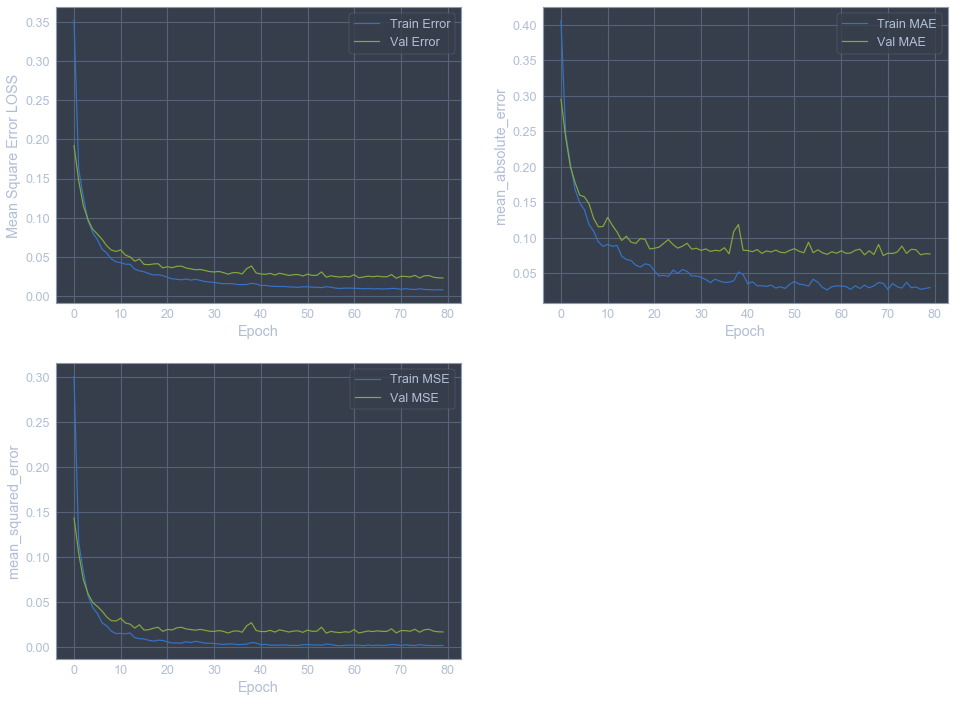

In [9]:
plotHistory(history)

## Predicción

In [10]:
y_predic= model.predict(X_test)

y_p = scaler.inverse_transform(y_predic)
y_t = scaler.inverse_transform(y_test)


In [11]:
print("SMAPE: ",sMAPE(y_t, y_p))
print("SMAPE: ",mAPE(y_t, y_p))

SMAPE:  0.8811966084427709
SMAPE:  1.7422754371964067


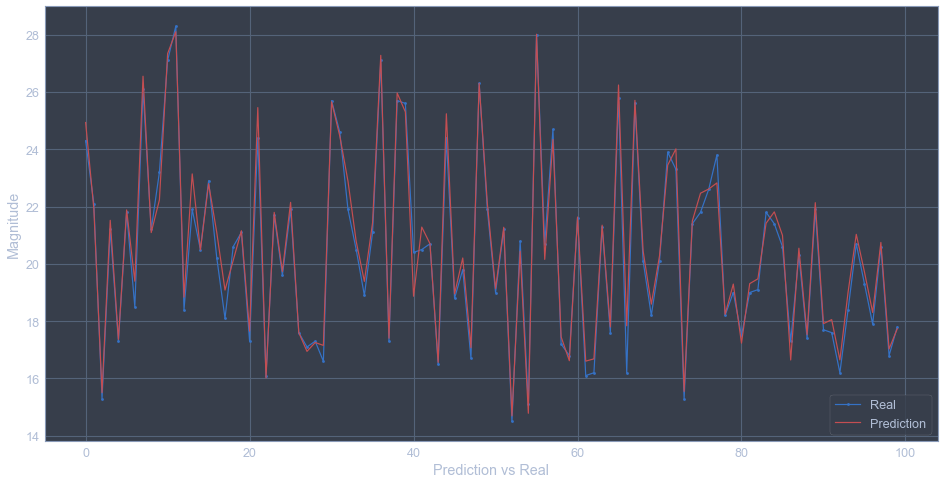

In [12]:
graphPrediction(y_t, y_p, 100)

In [13]:
model.save('modelo.h5')